In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


# **Load the Dataset**

In [3]:
import pandas as pd
df = pd.read_excel('online_retail_II.xlsx')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


# **Dataset Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


# **Drop Missing Customer ID**

In [7]:
df=df.dropna(subset=['Customer ID'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# **Remove Cancelled Transactions**

In [8]:
filtdf=df[~df['Invoice'].astype(str).str.startswith('C')].copy()
filtdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# **Filter out Negative or Zero Quantities & Prices**

In [9]:
filtdf=filtdf[(filtdf['Quantity']>0) & (filtdf['Price']>0)].copy()
filtdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# **Create New Features(to reach 11+ columns)**

# **Total Price**

In [10]:
filtdf['Total Price'] = filtdf['Quantity']*filtdf['Price']
filtdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


# **Invoice Date - Time parts**

In [11]:
filtdf['InvoiceDate']=pd.to_datetime(filtdf['InvoiceDate'])
filtdf['InvoiceMonth']=filtdf['InvoiceDate'].dt.month
filtdf['InvoiceDay']=filtdf['InvoiceDate'].dt.day
filtdf['InvoiceHour']=filtdf['InvoiceDate'].dt.hour
filtdf['weekday']=filtdf['InvoiceDate'].dt.day_name()
filtdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth,InvoiceDay,InvoiceHour,weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,1,7,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,1,7,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,1,7,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,1,7,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,1,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,9,20,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,9,20,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,9,20,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,9,20,Thursday


# **Outlier Removal (IQR Method)**

In [12]:
def removeoutliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return df[(df[column]>=lower)&(df[column]<=upper)].copy()


In [13]:
 print("Initial Shape before outlier removal : ",filtdf.shape)

Initial Shape before outlier removal :  (407664, 13)


In [14]:
filtdf=removeoutliers(filtdf,'Quantity')
filtdf=removeoutliers(filtdf,'Price')
filtdf=removeoutliers(filtdf,'Total Price')
filtdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth,InvoiceDay,InvoiceHour,weekday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,1,7,Tuesday
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,1,7,Tuesday
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,12,1,7,Tuesday
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,12,1,7,Tuesday
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,12,1,9,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,9,20,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,9,20,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,9,20,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,9,20,Thursday


In [15]:
print("Shape after outlier removal : ",filtdf.shape)

Shape after outlier removal :  (333669, 13)


# **Scaling Numeric Features**

In [16]:
from sklearn.preprocessing import StandardScaler
scaledcolumns=['Quantity','Price','Total Price']
scaler=StandardScaler()
filtdf[scaledcolumns]=scaler.fit_transform(filtdf[scaledcolumns])
print("Feature Scaling Completed")
filtdf[scaledcolumns].head()

Feature Scaling Completed


,Quantity,Price,Total Price
4,2.751096,-0.637065,2.346418
6,2.751096,-0.637065,2.346418
8,0.843669,0.165425,2.419972
11,0.843669,0.165425,2.419972
14,-0.586901,2.264243,0.856963


# **Final Check**

In [17]:
print("Final Dataset Shape : ",filtdf.shape)
print("Final Columns : ",filtdf.columns)

Final Dataset Shape :  (333669, 13)
Final Columns :  Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total Price', 'InvoiceMonth',
       'InvoiceDay', 'InvoiceHour', 'weekday'],
      dtype='object')


# **EDA & Visualizations(Customer + Sales Insights)**

# **Top Selling Products**

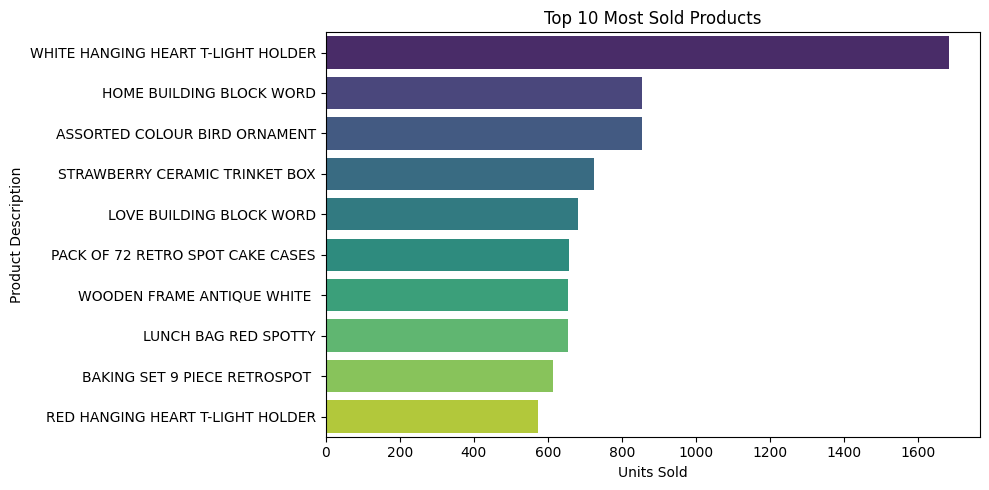

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

topproducts = filtdf['Description'].value_counts().head(10)

sns.barplot(
    y=topproducts.index,
    x=topproducts.values,
    hue=topproducts.index,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Top 10 Most Sold Products")
plt.xlabel("Units Sold")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# **Monthly Sales Trend**

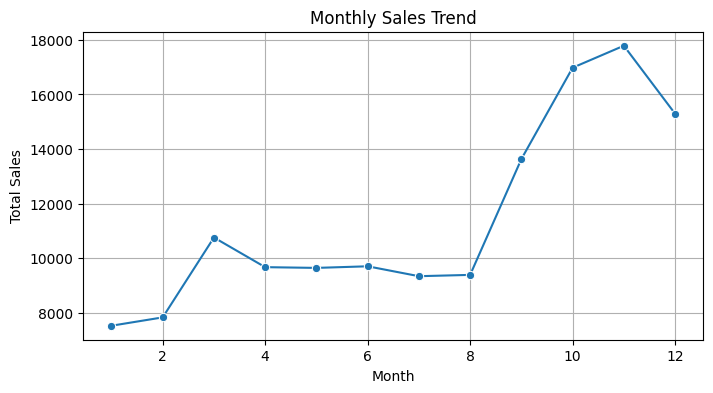

In [30]:
filtdf = filtdf[filtdf['Total Price'] >= 0]
monthlysales=filtdf.groupby('InvoiceMonth')['Total Price'].sum()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthlysales.index,y=monthlysales.values,marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# **Sales by Country (Top 10)**

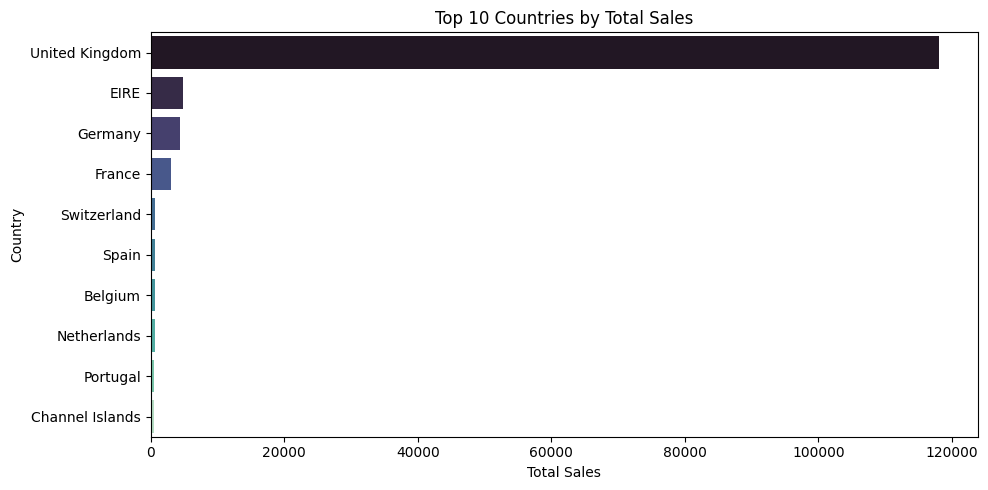

In [31]:
countrysales=filtdf.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(
    x=countrysales.values,
    y=countrysales.index,
    hue=countrysales.index,
    dodge=False,
    palette='mako',
    legend=False
    )
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

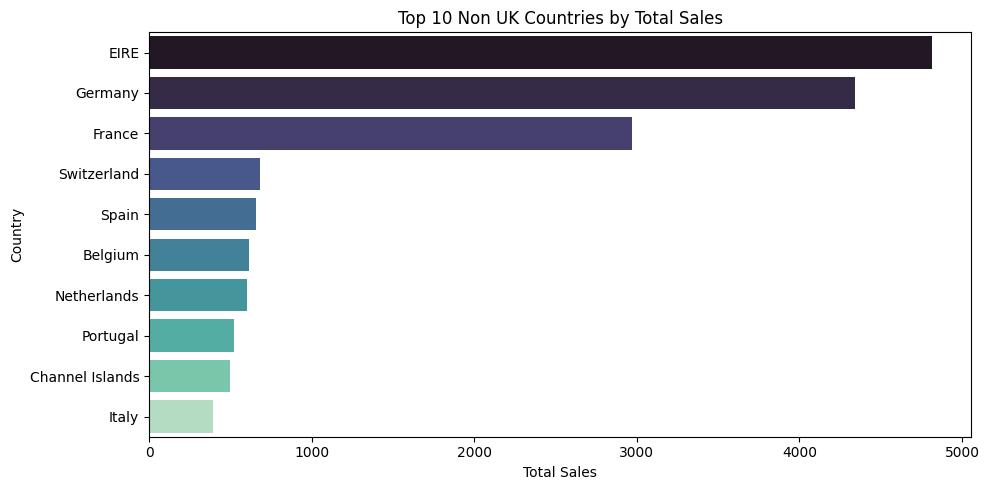

In [32]:
nonuksales=filtdf[filtdf['Country']!='United Kingdom']
countrysales=(
              nonuksales.groupby('Country')['Total Price']
                .sum()
                .sort_values(ascending=False)
                .head(10)
            )
plt.figure(figsize=(10,5))
sns.barplot(
    x=countrysales.values,
    y=countrysales.index,
   hue=countrysales.index,
    dodge=False,
    palette='mako',
    legend=False
    )
plt.title("Top 10 Non UK Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# **Sales by Day of the week**

In [33]:

weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekdaysales=(
    filtdf.groupby('weekday')['Total Price']
    .sum()
    .reindex(weekdays,fill_value=0)
)
print(weekdaysales)

weekday
Monday       22322.778053
Tuesday      25677.959108
Wednesday    24011.972938
Thursday     28982.640822
Friday       19019.786236
Saturday       311.325064
Sunday       17174.154821
Name: Total Price, dtype: float64


In [34]:
weekdaysales = weekdaysales[weekdaysales > 0]

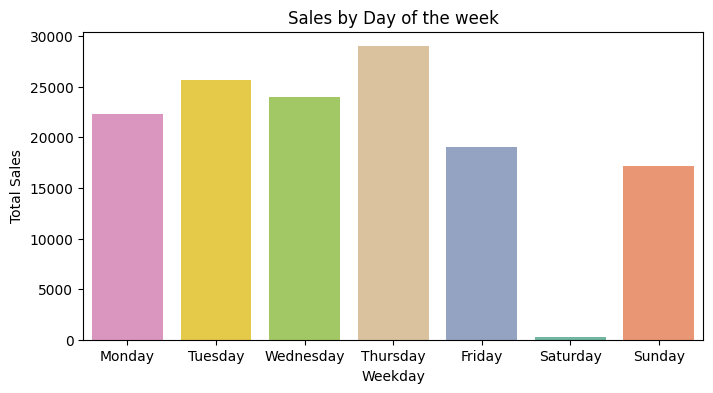

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=weekdaysales.index,
    y=weekdaysales.values,
    hue=weekdaysales.values,
    dodge=False,
    palette='Set2',
    legend=False
    )
plt.title("Sales by Day of the week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.show()

In [37]:
print(filtdf['weekday'].value_counts())

weekday
Thursday     30630
Tuesday      26486
Wednesday    24955
Monday       23586
Friday       19964
Sunday       18802
Saturday       268
Name: count, dtype: int64


# **Customer Spending Distribution**

In [38]:
customersales=filtdf.groupby('Customer ID')['Total Price'].sum()
filteredsales=customersales[customersales < 500]
print(customersales.describe())

count    3963.000000
mean       34.696093
std        86.247266
min         0.004971
25%         6.044302
50%        15.285721
75%        39.215018
max      3404.242993
Name: Total Price, dtype: float64


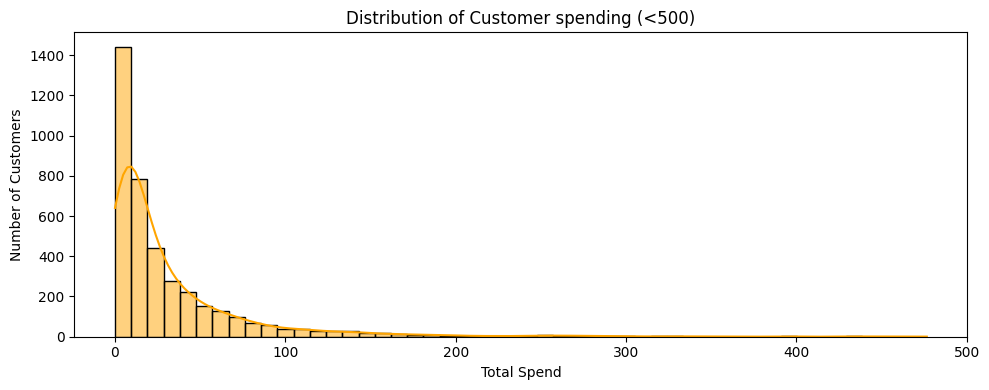

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(filteredsales,bins=50,kde=True,color='orange')
plt.title("Distribution of Customer spending (<500)")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

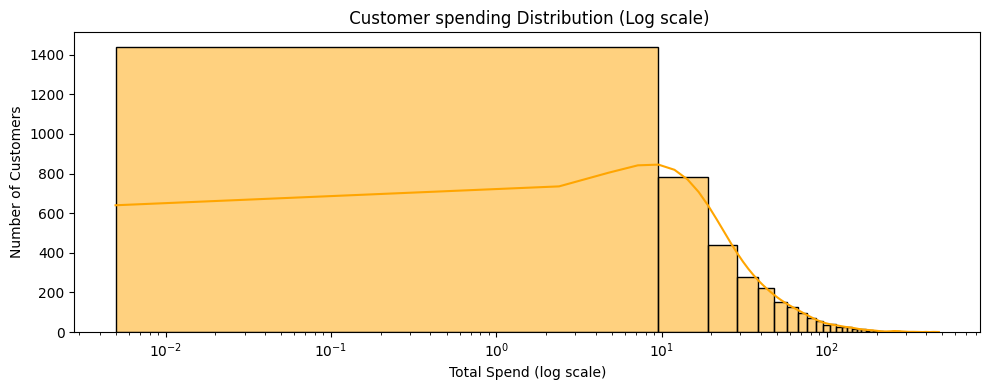

In [40]:
plt.figure(figsize=(10,4))
sns.histplot(filteredsales,bins=50,kde=True,color='orange')
plt.xscale('log')
plt.title(" Customer spending Distribution (Log scale)")
plt.xlabel("Total Spend (log scale)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# MODEL **BUILDING**

# **Customer Segmentation (Clustering)[RFM & KMeans]**

# **Create RFM Features**

# **RFM Calculation**

In [41]:
import threadpoolctl
import sklearn
import numpy
import scipy

print("threadpoolctl:", threadpoolctl.__version__)
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)

threadpoolctl: 3.6.0
scikit-learn: 1.6.1
numpy: 2.0.2
scipy: 1.15.3


In [42]:
import datetime as dt
referencedate=filtdf['InvoiceDate'].max()+pd.Timedelta(days=1)
rfm=filtdf.groupby('Customer ID').agg({
    'InvoiceDate':lambda x: (referencedate-x.max()).days,
    'Invoice':'nunique',
    'Total Price':'sum'
})
rfm.columns=['Recency','Frequency','Monetary']
rfm=rfm.reset_index()

# **Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfmscaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# **Elbow Method to find optimal k**

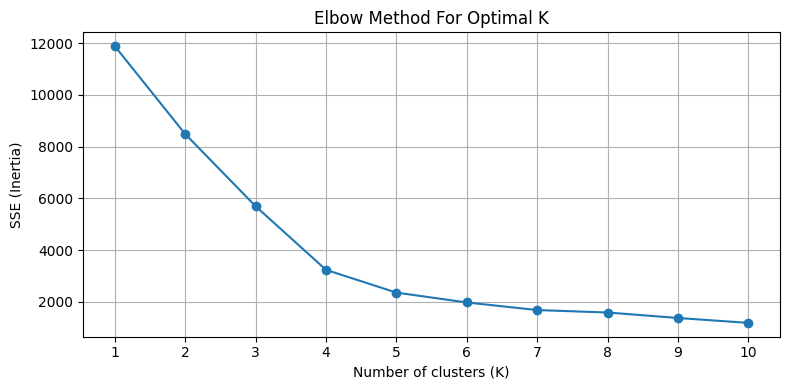

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfmscaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Silhoutte Score**

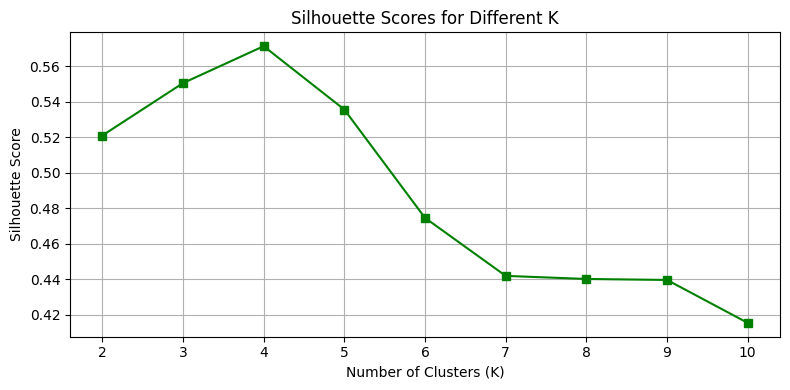

In [45]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfmscaled)
    score = silhouette_score(rfmscaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Final Clustering with Best K (K=3)**

In [53]:
bestk = 3
final_kmeans = KMeans(n_clusters=bestk, random_state=42)
rfm['Cluster'] = final_kmeans.fit_predict(rfmscaled)

# **Analyze the Clusters (Customer Profiling)**

# **Cluster Summary (Mean RFM values per cluster)**

In [47]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,42.88,4.20,37.05
1,242.09,1.57,11.66
2,10.10,51.55,585.76


# **Visualize the Clusters**

# **2D Scatter Plot using PCA (if 3 clusters)**

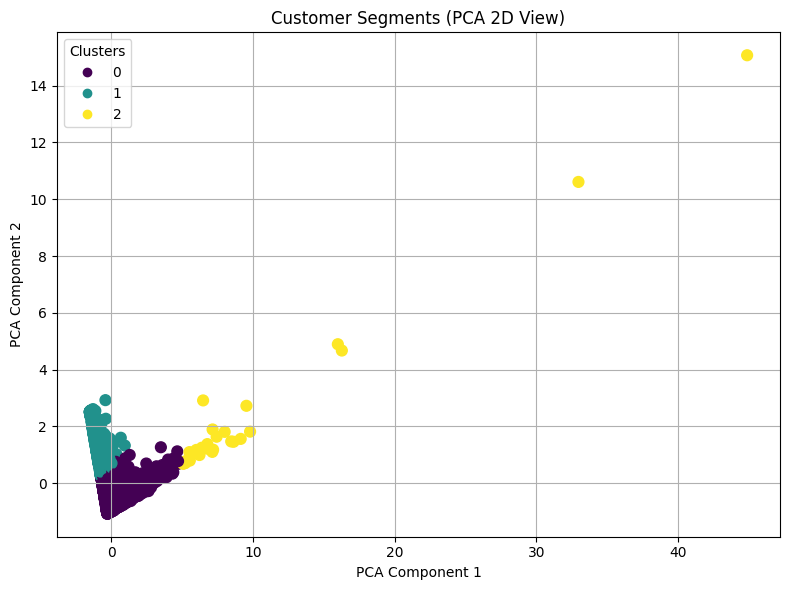

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(rfmscaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                      c=rfm['Cluster'], cmap='viridis', s=60)
plt.title('Customer Segments (PCA 2D View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

# **Save/Export the Data with Cluster Labels**

In [49]:
rfm.to_csv("customer_segments.csv", index=False)

# **Label Segments (Business Insight)**

In [51]:
segment_map = {
    0: 'Loyal Customers',
    1: 'Churn Risk',
    2: 'New Customers'
}
rfm['Segment'] = rfm['Cluster'].map(segment_map)
segment_summary = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count']).round(2)
segment_summary

Recency       Frequency       Monetary      
                   mean count      mean count     mean count
Segment                                                     
Churn Risk       242.09   994      1.57   994    11.66   994
Loyal Customers   42.88  2940      4.20  2940    37.05  2940
New Customers     10.10    29     51.55    29   585.76    29